In [80]:
import pandas as pd
import geopandas as gpd

In [130]:
data_hk_cities = pd.read_csv("C:\Eigene Dateien\Datafest\DataFest_GeoChallenge\Data\HiDrive\panel\CampusFile_WK_cities.csv", index_col = 'obid')

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\3183108999.py:1: DtypeWarning: Columns (1,11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_hk_cities = pd.read_csv("C:\Eigene Dateien\Datafest\DataFest_GeoChallenge\Data\HiDrive\panel\CampusFile_WK_cities.csv", index_col = 'obid')


In [109]:
data_hk_cities.columns

Index(['plz', 'kaufpreis', 'heizkosten', 'baujahr', 'letzte_modernisierung',
       'wohnflaeche', 'grundstuecksflaeche', 'nutzflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'nebenraeume', 'schlafzimmer',
       'badezimmer', 'parkplatzpreis', 'wohngeld', 'ev_kennwert',
       'laufzeittage', 'hits', 'click_schnellkontakte', 'click_customer',
       'click_weitersagen', 'click_url', 'liste_show', 'liste_match',
       'immobilientyp', 'aufzug', 'balkon', 'denkmalobjekt', 'einbaukueche',
       'einliegerwohnung', 'ev_wwenthalten', 'gaestewc', 'garten', 'keller',
       'parkplatz', 'rollstuhlgerecht', 'bauphase', 'ausstattung',
       'energieeffizienzklasse', 'energieausweistyp', 'haustier_erlaubt',
       'heizungsart', 'kategorie_Wohnung', 'objektzustand', 'ergg_1km', 'blid',
       'gid2019', 'kid2019', 'bef1', 'bef2', 'bef10', 'bef9', 'bef8', 'bef7',
       'bef6', 'bef5', 'bef4', 'bef3', 'anbieter', 'duplicateid', 'spell',
       'hits_gen', 'click_schnellkontakte_gen'

In [110]:
len(data_hk_cities)

986641

In [112]:
data_hk_cities[['ergg_1km', 'plz', 'kid2019','wohnflaeche','nutzflaeche','grundstuecksflaeche','kid2019','gid2019']].head()


,ergg_1km,plz,kid2019,wohnflaeche,nutzflaeche,grundstuecksflaeche,kid2019,gid2019
obid,,,,,,,,
42429799,4322_3385,22083,2000,63.11,Other missing,Variable for other types only,2000,2000000
42311647,4317_3385,20255,2000,71.00,Other missing,Variable for other types only,2000,2000000
41405621,4314_3389,22523,2000,67.55,Other missing,Variable for other types only,2000,2000000
39043105,4320_3387,22299,2000,54.00,Other missing,Variable for other types only,2000,2000000
43219451,4322_3384,22085,2000,67.00,Other missing,Variable for other types only,2000,2000000


In [113]:
data_hk_cities[['easting', 'northing']] = data_hk_cities['ergg_1km'].str.split('_', expand=True)
data_hk_cities[['ergg_1km', 'easting', 'northing']].head()


,ergg_1km,easting,northing
obid,,,
42429799,4322_3385,4322,3385
42311647,4317_3385,4317,3385
41405621,4314_3389,4314,3389
39043105,4320_3387,4320,3387
43219451,4322_3384,4322,3384


In [124]:
(data_hk_cities['ergg_1km'] == '-9').sum() / len(data_hk_cities)

np.float64(0.05788123542402961)

In [115]:
data_hk_cities[['ergg_1km', 'plz', 'kid2019','wohnflaeche','nutzflaeche','grundstuecksflaeche']].apply(lambda x: x == 'Other missing').sum() / len(data_hk_cities)

ergg_1km               0.000000
plz                    0.000746
kid2019                0.000000
wohnflaeche            0.000000
nutzflaeche            0.729136
grundstuecksflaeche    0.000000
dtype: float64

In [116]:
data_hk_cities.columns

Index(['plz', 'kaufpreis', 'heizkosten', 'baujahr', 'letzte_modernisierung',
       'wohnflaeche', 'grundstuecksflaeche', 'nutzflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'nebenraeume', 'schlafzimmer',
       'badezimmer', 'parkplatzpreis', 'wohngeld', 'ev_kennwert',
       'laufzeittage', 'hits', 'click_schnellkontakte', 'click_customer',
       'click_weitersagen', 'click_url', 'liste_show', 'liste_match',
       'immobilientyp', 'aufzug', 'balkon', 'denkmalobjekt', 'einbaukueche',
       'einliegerwohnung', 'ev_wwenthalten', 'gaestewc', 'garten', 'keller',
       'parkplatz', 'rollstuhlgerecht', 'bauphase', 'ausstattung',
       'energieeffizienzklasse', 'energieausweistyp', 'haustier_erlaubt',
       'heizungsart', 'kategorie_Wohnung', 'objektzustand', 'ergg_1km', 'blid',
       'gid2019', 'kid2019', 'bef1', 'bef2', 'bef10', 'bef9', 'bef8', 'bef7',
       'bef6', 'bef5', 'bef4', 'bef3', 'anbieter', 'duplicateid', 'spell',
       'hits_gen', 'click_schnellkontakte_gen'

In [117]:
data_hk_cities['len_ergg'] = data_hk_cities['ergg_1km'].apply(len) 
data_hk_cities['len_ergg'] 

obid
42429799     9
42311647     9
41405621     9
39043105     9
43219451     9
            ..
141682083    9
141245560    9
139036779    9
143970732    9
141076617    9
Name: len_ergg, Length: 986641, dtype: int64

In [118]:
data_hk_cities[data_hk_cities['len_ergg'] == 9]


,plz,kaufpreis,heizkosten,baujahr,letzte_modernisierung,wohnflaeche,grundstuecksflaeche,nutzflaeche,etage,anzahletagen,...,click_weitersagen_gen,click_url_gen,liste_show_gen,liste_match_gen,adat,edat,price_sqm,easting,northing,len_ergg
obid,,,,,,,,,,,,,,,,,,,,,
42429799,22083,149000.0,Other missing,NaN,Other missing,63.11,Variable for other types only,Other missing,1,4,...,0.029630,0.000000,136.82964,310.65927,2007m7,2007m7,2360.9570,4322,3385,9
42311647,20255,198000.0,Other missing,1900.0,Other missing,71.00,Variable for other types only,Other missing,1,Other missing,...,0.000000,0.000000,42.00000,179.00000,2007m7,2007m7,2788.7324,4317,3385,9
41405621,22523,80000.0,Other missing,1964.0,Other missing,67.55,Variable for other types only,Other missing,3,Other missing,...,0.000000,0.000000,130.65517,294.93103,2007m4,2007m5,1184.3079,4314,3389,9
39043105,22299,79500.0,Other missing,NaN,Other missing,54.00,Variable for other types only,Other missing,Other missing,Other missing,...,0.005495,0.032967,105.71429,241.39560,2007m3,2007m4,1472.2222,4320,3387,9
43219451,22085,111900.0,Other missing,1964.0,Other missing,67.00,Variable for other types only,Other missing,Other missing,Other missing,...,0.000000,0.000000,97.00000,249.00000,2007m9,2007m9,1670.1493,4322,3384,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141682083,4277,135000.0,Variable for other types only,1905.0,Other missing,54.00,Variable for other types only,Other missing,Other missing,Other missing,...,0.000000,0.000000,603.66669,2975.66670,2023m4,2023m4,2500.0000,4487,3135,9
141245560,4275,170000.0,Variable for other types only,1905.0,Other missing,64.00,Variable for other types only,Other missing,4,Other missing,...,0.000000,0.000000,570.54816,14688.51900,2023m7,2023m12,2656.2500,4486,3137,9
139036779,4109,359000.0,Variable for other types only,1900.0,Implausible value,67.00,Variable for other types only,Other missing,4,4,...,0.000000,0.000000,1377.52380,7710.19040,2023m1,2023m2,5358.2090,4485,3139,9


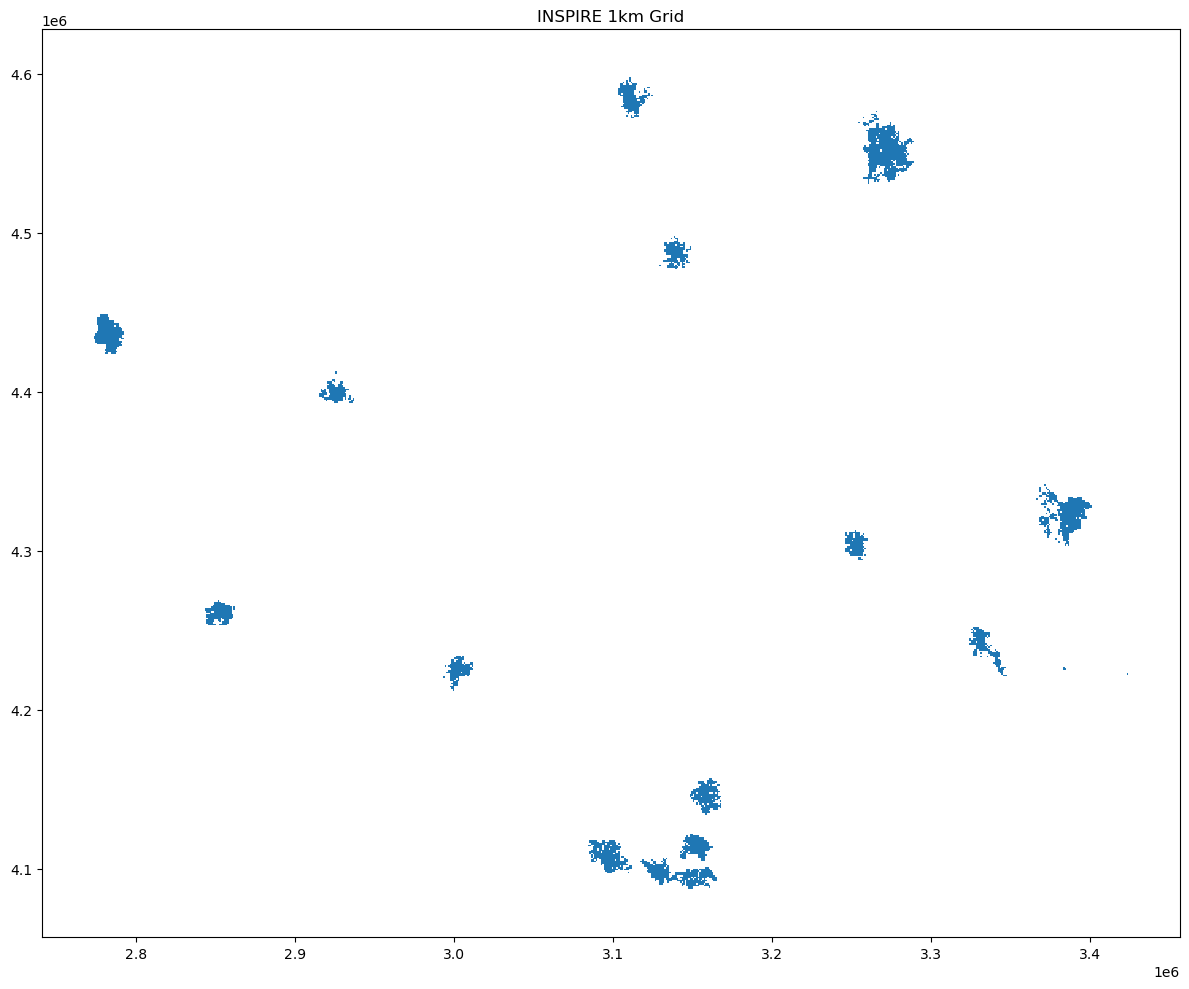

In [119]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Assuming you have your data in a DataFrame called 'df' with the 'ergg_1km' column
# df = pd.read_csv('your_data.csv')

# First, you need to convert INSPIRE grid codes to geometries
# This is a simplified example - actual conversion depends on the specific INSPIRE grid coding scheme

def inspire_code_to_geometry(code):
    # This function needs to be adapted to your specific INSPIRE grid format
    # Here's a placeholder implementation - you'll need to replace this with the actual logic
    # Example: if code format is like "1kmN3394E4566" extracting northing and easting
    try:
        # Extract coordinates from the code - this is just an example
        # You'll need to adjust based on your actual code format
        parts = code.split('_')
        east = int(parts[1])
        
        north = int(parts[0])
        
        # Create a 1km x 1km box at these coordinates
        return box(east * 1000, north * 1000, (east + 1) * 1000, (north + 1) * 1000)
    except:
        return None

# Create geometries from your grid codes
geometries = data_hk_cities['ergg_1km'].apply(inspire_code_to_geometry)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data_hk_cities, geometry=geometries, crs="EPSG:3035")  # INSPIRE typically uses EPSG:3035

# If you want to visualize some other variable in your dataset
# For example, let's say you have a 'value' column you want to visualize
if 'value' in data_hk_cities.columns:
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf.plot(column='value', cmap='viridis', legend=True, ax=ax)
    plt.title('Grid Visualization')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    # Just visualize the grid itself
    fig, ax = plt.subplots(figsize=(12, 10))
    gdf.plot(ax=ax)
    plt.title('INSPIRE 1km Grid')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [120]:
data_hk_cities['ergg_1km']

obid
42429799     4322_3385
42311647     4317_3385
41405621     4314_3389
39043105     4320_3387
43219451     4322_3384
               ...    
141682083    4487_3135
141245560    4486_3137
139036779    4485_3139
143970732    4486_3136
141076617    4480_3137
Name: ergg_1km, Length: 986641, dtype: object

In [121]:
import os
os.chdir('C:\Eigene Dateien\Datafest\DataFest_GeoChallenge')
os.getcwd()

'C:\\Eigene Dateien\\Datafest\\DataFest_GeoChallenge'

<Axes: >

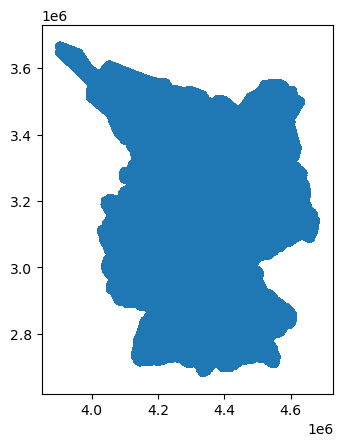

In [122]:
municipal_boundaries = gpd.read_file(f"{os.getcwd()}\Data/Shapefile/Germany_shapefile/de_1km.shp")
municipal_boundaries.plot()

In [127]:
import geopandas as gpd
import pandas as pd

# here I add geometry to the data
data_hk_cities = data_hk_cities[data_hk_cities['len_ergg'] == 9]
data_hk_cities[['x_idx', 'y_idx']] = data_hk_cities['ergg_1km'].str.split('_', expand=True).astype(int)

data_hk_cities['x'] = data_hk_cities['x_idx'] * 1000 + 500  # +500 to center
data_hk_cities['y'] = data_hk_cities['y_idx'] * 1000 + 500

gdf = gpd.GeoDataFrame(
    data_hk_cities,
    geometry=gpd.points_from_xy(data_hk_cities['x'], data_hk_cities['y']),
    crs='EPSG:3035'
)
from shapely.geometry import box

def grid_cell_polygon(x_idx, y_idx):
    x0 = x_idx * 1000
    y0 = y_idx * 1000
    return box(x0, y0, x0 + 1000, y0 + 1000)

data_hk_cities['geometry'] = [grid_cell_polygon(x, y) for x, y in zip(data_hk_cities['x_idx'], data_hk_cities['y_idx'])]

gdf_poly = gpd.GeoDataFrame(data_hk_cities, geometry='geometry', crs='EPSG:3035')

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\642831868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hk_cities[['x_idx', 'y_idx']] = data_hk_cities['ergg_1km'].str.split('_', expand=True).astype(int)
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\642831868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hk_cities[['x_idx', 'y_idx']] = data_hk_cities['ergg_1km'].str.split('_', expand=True).astype(int)
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\642831868

In [129]:
gdf_poly

,plz,kaufpreis,heizkosten,baujahr,letzte_modernisierung,wohnflaeche,grundstuecksflaeche,nutzflaeche,etage,anzahletagen,...,edat,price_sqm,easting,northing,len_ergg,x_idx,y_idx,x,y,geometry
obid,,,,,,,,,,,,,,,,,,,,,
42429799,22083,149000.0,Other missing,NaN,Other missing,63.11,Variable for other types only,Other missing,1,4,...,2007m7,2360.9570,4322,3385,9,4322,3385,4322500,3385500,"POLYGON ((4323000 3385000, 4323000 3386000, 43..."
42311647,20255,198000.0,Other missing,1900.0,Other missing,71.00,Variable for other types only,Other missing,1,Other missing,...,2007m7,2788.7324,4317,3385,9,4317,3385,4317500,3385500,"POLYGON ((4318000 3385000, 4318000 3386000, 43..."
41405621,22523,80000.0,Other missing,1964.0,Other missing,67.55,Variable for other types only,Other missing,3,Other missing,...,2007m5,1184.3079,4314,3389,9,4314,3389,4314500,3389500,"POLYGON ((4315000 3389000, 4315000 3390000, 43..."
39043105,22299,79500.0,Other missing,NaN,Other missing,54.00,Variable for other types only,Other missing,Other missing,Other missing,...,2007m4,1472.2222,4320,3387,9,4320,3387,4320500,3387500,"POLYGON ((4321000 3387000, 4321000 3388000, 43..."
43219451,22085,111900.0,Other missing,1964.0,Other missing,67.00,Variable for other types only,Other missing,Other missing,Other missing,...,2007m9,1670.1493,4322,3384,9,4322,3384,4322500,3384500,"POLYGON ((4323000 3384000, 4323000 3385000, 43..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141682083,4277,135000.0,Variable for other types only,1905.0,Other missing,54.00,Variable for other types only,Other missing,Other missing,Other missing,...,2023m4,2500.0000,4487,3135,9,4487,3135,4487500,3135500,"POLYGON ((4488000 3135000, 4488000 3136000, 44..."
141245560,4275,170000.0,Variable for other types only,1905.0,Other missing,64.00,Variable for other types only,Other missing,4,Other missing,...,2023m12,2656.2500,4486,3137,9,4486,3137,4486500,3137500,"POLYGON ((4487000 3137000, 4487000 3138000, 44..."
139036779,4109,359000.0,Variable for other types only,1900.0,Implausible value,67.00,Variable for other types only,Other missing,4,4,...,2023m2,5358.2090,4485,3139,9,4485,3139,4485500,3139500,"POLYGON ((4486000 3139000, 4486000 3140000, 44..."


C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\3968220071.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)]
c:\Anaconda\envs\startHack\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


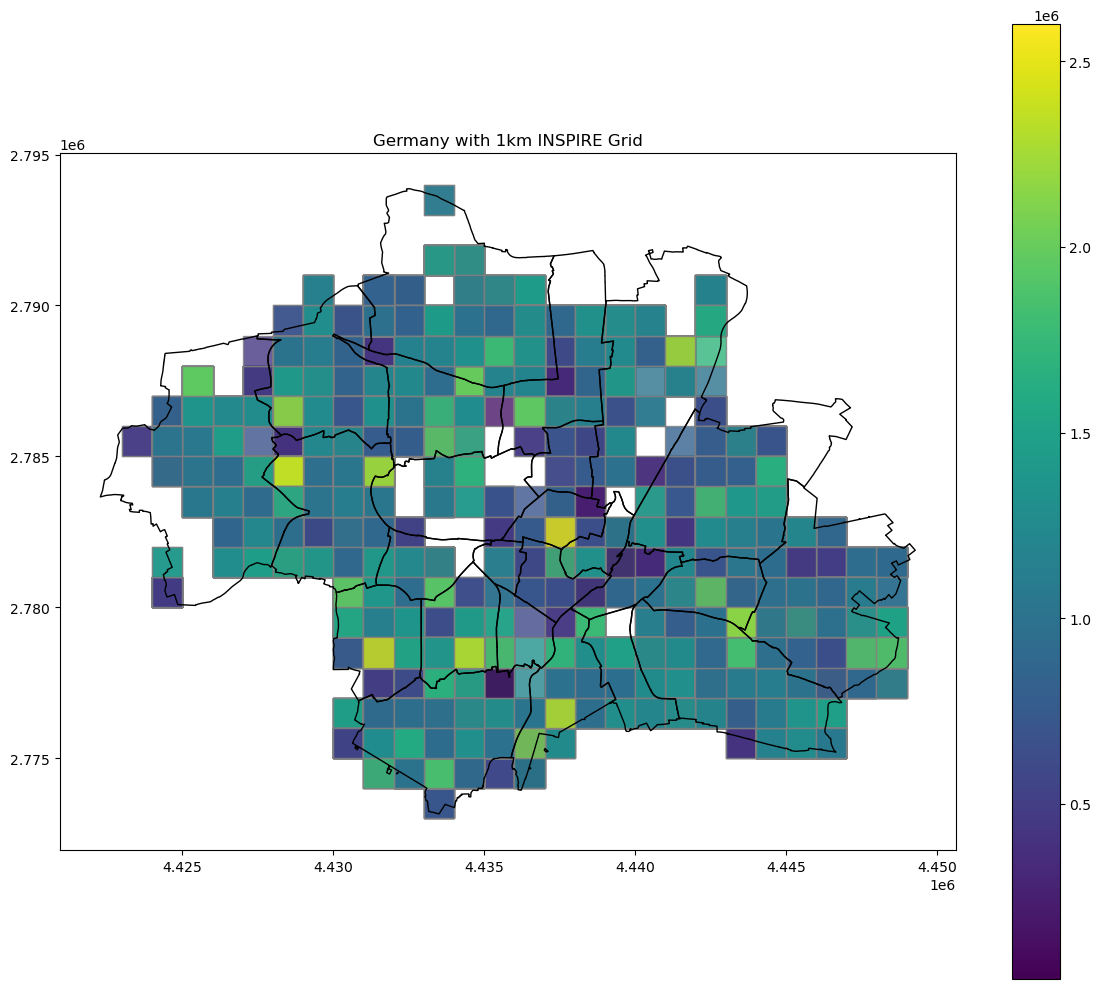

In [123]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt

munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")

# Step 2: Reproject to ETRS89-LAEA (EPSG:3035) as per INSPIRE guidelines
munich = munich.to_crs(epsg=3035)

# Step 3: Create a grid with 1km cells
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters

# Create the grid cells
grid_cells = []
for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))

# Step 4: Create a GeoDataFrame from the grid
grid = gdf_poly

# Step 5: Keep only cells that intersect with Germany
munich_grid = grid[grid.intersects(munich.unary_union)]

# Step 6: Add grid cell identifiers as per INSPIRE
# Create cell IDs based on coordinates (following the INSPIRE grid naming convention)
munich_grid['cell_id'] = [f"1km_{int(geom.centroid.x)}E_{int(geom.centroid.y)}N" for geom in munich_grid.geometry]

# Step 7: Plot the grid
fig, ax = plt.subplots(figsize=(12, 10))
munich.boundary.plot(ax=ax, color='black', linewidth=1)
munich_grid.plot(column = 'kaufpreis', ax=ax, edgecolor='gray', alpha=0.8, linewidth=1, legend=True)
plt.title("Germany with 1km INSPIRE Grid")
plt.tight_layout()
plt.show()

# Optional: Save the grid to a file
munich_grid.to_file("germany_1km_inspire_grid.gpkg", driver="GPKG")

In [107]:
munich_grid['ergg2019']

KeyError: 'ergg2019'

In [106]:
munich_grid['gid2019']

obid
44089776     9162000
42544376     9162000
40424568     9162000
42858569     9162000
41086278     9162000
              ...   
145258778    9162000
142321253    9162000
140013144    9162000
143622055    9162000
140901388    9162000
Name: gid2019, Length: 14637, dtype: int64

In [96]:
data_hk_cities[['kaufpreis', 'geometry']]

,kaufpreis,geometry
obid,,
43282109,219700.0,"POLYGON ((4318000 3370000, 4318000 3371000, 43..."
40500064,447000.0,"POLYGON ((4334000 3367000, 4334000 3368000, 43..."
39823119,209493.0,"POLYGON ((4333000 3388000, 4333000 3389000, 43..."
42069551,489000.0,"POLYGON ((4327000 3394000, 4327000 3395000, 43..."
42741328,320000.0,"POLYGON ((4326000 3388000, 4326000 3389000, 43..."
...,...,...
140792848,695000.0,"POLYGON ((4483000 3143000, 4483000 3144000, 44..."
138461041,781900.0,"POLYGON ((4491000 3143000, 4491000 3144000, 44..."
144723010,395000.0,"POLYGON ((4480000 3139000, 4480000 3140000, 44..."


In [ ]:
munich_grid

,geometry,cell_id
10,"POLYGON ((4423280 2783154, 4423280 2784154, 44...",1km_4422780E_2783654N
11,"POLYGON ((4423280 2784154, 4423280 2785154, 44...",1km_4422780E_2784654N
12,"POLYGON ((4423280 2785154, 4423280 2786154, 44...",1km_4422780E_2785654N
31,"POLYGON ((4424280 2782154, 4424280 2783154, 44...",1km_4423780E_2782654N
32,"POLYGON ((4424280 2783154, 4424280 2784154, 44...",1km_4423780E_2783654N
...,...,...
578,"POLYGON ((4449280 2779154, 4449280 2780154, 44...",1km_4448780E_2779654N
579,"POLYGON ((4449280 2780154, 4449280 2781154, 44...",1km_4448780E_2780654N
580,"POLYGON ((4449280 2781154, 4449280 2782154, 44...",1km_4448780E_2781654N
581,"POLYGON ((4449280 2782154, 4449280 2783154, 44...",1km_4448780E_2782654N


In [ ]:
pd.read_csv("Data\municipal_main\municipal_main.csv")

,ID,AGS,ARS,GEN,lan_name,east_west,fuaname_core,fuaname_comm,KFL_2021,bs_2005,...,Discontinous_low_dense_urban_2018,Isolated_strcutures_2018,Discontinous_dense_urban_2018,Green_urban_area_2018,Industrial_commercial_2018,Discontinous_medium_dense_urban_2018,Discontinous_very_low_dense_urban_2018,Land_no_current_use_2018,Fast_transit_roads_2018,Airports_2018
0,1,1051001.0,1.051518e+10,Albersdorf,Schleswig-Holstein,West,NaN,NaN,17.12,422018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1051002.0,1.051518e+10,Arkebek,Schleswig-Holstein,West,NaN,NaN,6.92,45613.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1051003.0,1.051516e+10,Averlak,Schleswig-Holstein,West,NaN,NaN,9.06,95403.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1051004.0,1.051518e+10,Bargenstedt,Schleswig-Holstein,West,NaN,NaN,11.90,156547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1051005.0,1.051517e+10,Barkenholm,Schleswig-Holstein,West,NaN,NaN,5.11,36667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10990,10991,16052000.0,1.605200e+11,Gera,Thüringen,East,Gera,NaN,152.18,6380840.0,...,6773000.0,353000.0,4288900.0,1838500.0,9035800.0,4856900.0,1979800.0,259400.0,518500.0,385800.0
10991,10992,16053000.0,1.605300e+11,Jena,Thüringen,East,Jena,NaN,114.77,4626010.0,...,1825300.0,81000.0,4855000.0,1980900.0,9938900.0,3032200.0,995200.0,55700.0,433600.0,0.0
10992,10993,16054000.0,1.605400e+11,Suhl,Thüringen,East,NaN,NaN,141.62,2709905.0,...,651800.0,50000.0,148000.0,33700.0,264800.0,282600.0,7700.0,35600.0,0.0,0.0
10993,10994,16055000.0,1.605500e+11,Weimar,Thüringen,East,Weimar,NaN,84.48,3641181.0,...,210600.0,180500.0,3814600.0,3226800.0,6441900.0,1279800.0,9000.0,208100.0,191700.0,0.0


In [ ]:
data_hk_cities[['gid2019', 'kid2019']]

,gid2019,kid2019
obid,,
43282109,2000000,2000
40358201,2000000,2000
40500064,2000000,2000
43592240,2000000,2000
37597406,2000000,2000
...,...,...
140792848,14713000,14713
138461041,14713000,14713
144723010,14713000,14713


In [ ]:
print(munich_grid['geometry'][11])

POLYGON ((4423280 2784154, 4423280 2785154, 4422280 2785154, 4422280 2784154, 4423280 2784154))


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx

# Step 1: Load Munich boundaries
munich = gpd.read_file("Data/Shapefile/StadtMuenchen/Muenchen_Stadtbezirke.json")

# Step 2: Reproject to ETRS89-LAEA (EPSG:3035) as per INSPIRE guidelines
munich = munich.to_crs(epsg=3035)

# Step 3: Create a grid with 1km cells
xmin, ymin, xmax, ymax = munich.total_bounds
cell_size = 1000  # 1km in meters

# Create the grid cells
grid_cells = []
grid_ids = []

for x0 in range(int(xmin), int(xmax + cell_size), cell_size):
    for y0 in range(int(ymin), int(ymax + cell_size), cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))
        
        # Create INSPIRE grid ID (you'll need to adapt this to match your data format)
        inspire_id = f"{int(x0)}_{int(y0)}"
        grid_ids.append(inspire_id)

# Step 4: Create a GeoDataFrame from the grid
grid = gpd.GeoDataFrame({'grid_id': grid_ids, 'geometry': grid_cells}, crs=munich.crs)

# Step 5: Keep only cells that intersect with Munich
munich_grid = grid[grid.intersects(munich.unary_union)]

# Step 6: Load your data that maps to the INSPIRE grid cells
# Assuming your data is in a CSV with columns 'grid_id' and 'value'
# Replace with your actual data loading code
your_data = data_hk_cities

# Step 7: Merge your data with the grid
munich_grid = munich_grid.merge(data_hk_cities, on='grid_id', how='left')

# Step 8: Create the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Convert to Web Mercator for basemap compatibility
munich_grid_wm = munich_grid.to_crs(epsg=3857)
munich_wm = munich.to_crs(epsg=3857)

# Plot grid cells with values
munich_grid_wm.plot(column='value', ax=ax, cmap='Blues', 
                   legend=True, alpha=0.7,
                   legend_kwds={'label': 'Your Value', 'orientation': 'vertical'})

# Plot Munich boundaries on top
munich_wm.boundary.plot(ax=ax, color='black', linewidth=1)

# Add a basemap for context (like in your example)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Title and layout
plt.title("Munich 1km INSPIRE Grid Values")
plt.tight_layout()
plt.savefig("munich_grid_map.png", dpi=300)
plt.show()

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11976\1072024901.py:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  munich_grid = grid[grid.intersects(munich.unary_union)]


KeyError: 'grid_id'

In [ ]:
german_grid

,geometry,cell_id
10,"POLYGON ((4423280 2783154, 4423280 2784154, 44...",1km_4422780E_2783654N
11,"POLYGON ((4423280 2784154, 4423280 2785154, 44...",1km_4422780E_2784654N
12,"POLYGON ((4423280 2785154, 4423280 2786154, 44...",1km_4422780E_2785654N
31,"POLYGON ((4424280 2782154, 4424280 2783154, 44...",1km_4423780E_2782654N
32,"POLYGON ((4424280 2783154, 4424280 2784154, 44...",1km_4423780E_2783654N
...,...,...
578,"POLYGON ((4449280 2779154, 4449280 2780154, 44...",1km_4448780E_2779654N
579,"POLYGON ((4449280 2780154, 4449280 2781154, 44...",1km_4448780E_2780654N
580,"POLYGON ((4449280 2781154, 4449280 2782154, 44...",1km_4448780E_2781654N
581,"POLYGON ((4449280 2782154, 4449280 2783154, 44...",1km_4448780E_2782654N
